In [1]:
import sys
sys.path.append('../../')
from utils.google_trends import GoogleTrends
from utils import misc
import analytics.video_games.data_preprocessing as data_preprocess
import pandas as pd
import re
import string
from collections import defaultdict
import dateutil.relativedelta as timedelta
gt = GoogleTrends()

2019-12-06 09:32:55,692 | [google_trends.py __init__:35] | [INFO] - Successfully connected session to Google Trends


# 1 Analysis of Movies

## 1.1 Individual Movies vs Search Trends


This is the analysis of movies trends with the sales made within a month of its release date

In [3]:
box_office_df = pd.read_csv("../../../conf/movies/box_office.csv").set_index('Date')
box_office_df.set_index(pd.to_datetime(box_office_df.index), inplace=True)

2019-12-06 08:45:28,169 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['Avengers Endgame'], start_date - 2019-04-26, end_date - 2019-05-26, category - None and geo - US
2019-12-06 08:45:28,842 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (31, 1)
2019-12-06 08:45:28,842 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            Avengers Endgame
date                        
2019-04-26                94
2019-04-27               100
2019-04-28                92
2019-04-29                58
2019-04-30                35


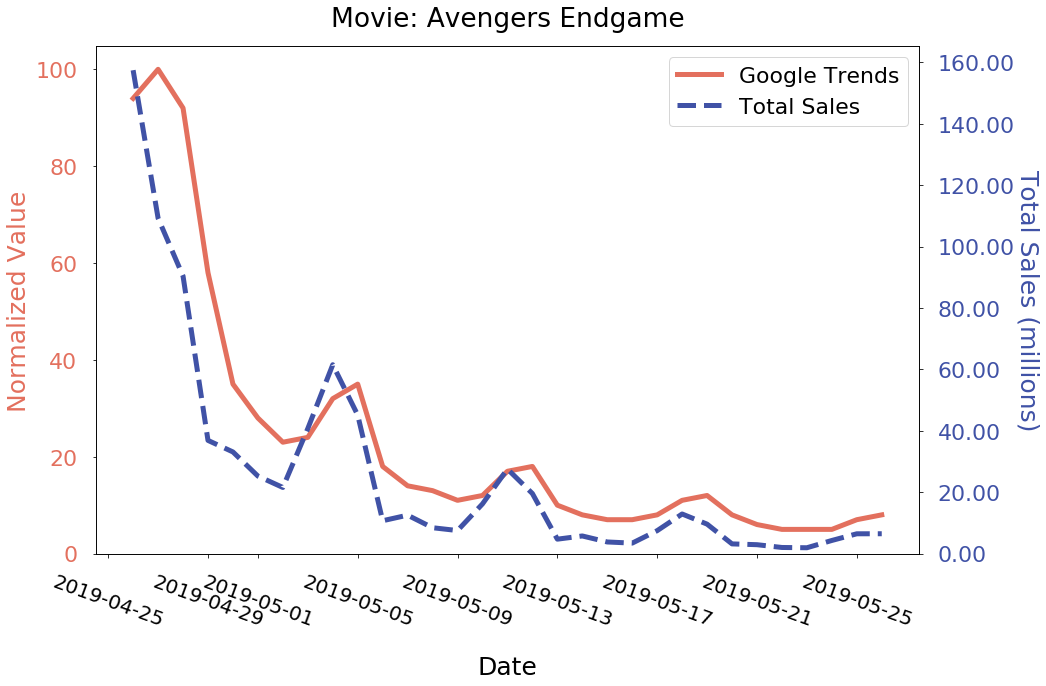

In [17]:
keywords = ['Avengers Endgame']
start_date = '2019-04-26'
end_date = '2019-05-26'
avengers_trends = gt.get_trends_data(keywords=keywords, start_date=start_date, end_date=end_date).data
avengers_sales = box_office_df['avengers'].dropna().to_frame()
misc.line_plot_2Yaxes_without_norm(df1=avengers_trends, df2=avengers_sales, save_fig=False)

2019-12-06 08:45:31,887 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['Black Panther'], start_date - 2018-02-16, end_date - 2018-03-16, category - None and geo - US
2019-12-06 08:45:32,757 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (29, 1)
2019-12-06 08:45:32,757 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            Black Panther
date                     
2018-02-16             67
2018-02-17             97
2018-02-18            100
2018-02-19             78
2018-02-20             51


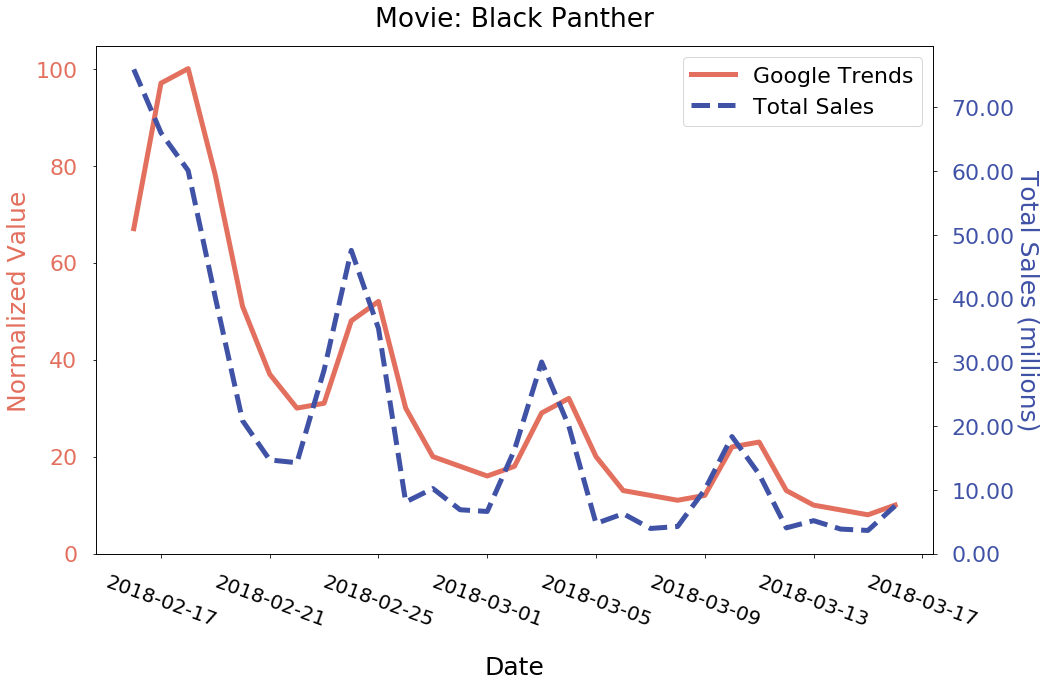

In [18]:
keywords = ['Black Panther']
start_date = '2018-02-16'
end_date = '2018-03-16'
blackpanther_trends = gt.get_trends_data(keywords=keywords, start_date=start_date, end_date=end_date).data
blackpanther_sales = box_office_df['blackpanther'].dropna().to_frame()
misc.line_plot_2Yaxes_without_norm(blackpanther_trends, blackpanther_sales, False, "Black Panther Time Series")

2019-12-06 08:45:33,217 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['Star Wars'], start_date - 2017-12-15, end_date - 2018-01-15, category - None and geo - US
2019-12-06 08:45:33,765 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (32, 1)
2019-12-06 08:45:33,769 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            Star Wars
date                 
2017-12-15         87
2017-12-16        100
2017-12-17         96
2017-12-18         64
2017-12-19         48


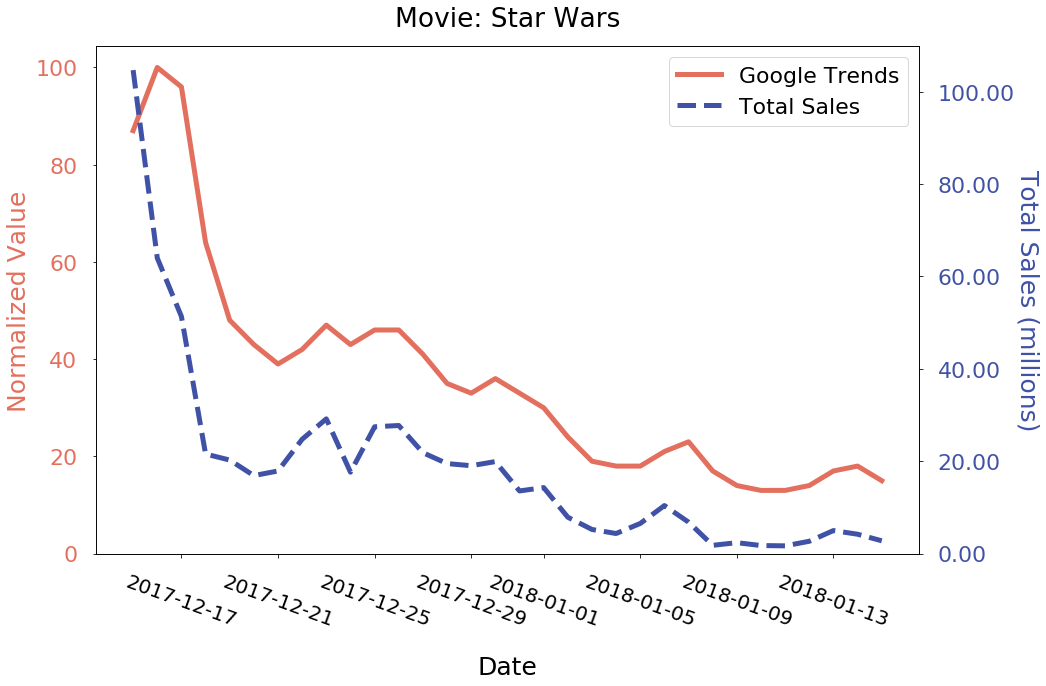

In [19]:
keywords = ['Star Wars']
start_date = '2017-12-15'
end_date = '2018-01-15'
starwars_trends = gt.get_trends_data(keywords=keywords, start_date=start_date, end_date=end_date).data
starwars_sales = box_office_df['starwars'].dropna().to_frame()
misc.line_plot_2Yaxes_without_norm(starwars_trends, starwars_sales, False, "Star Wars Time Series")

2019-12-06 08:45:40,225 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['Jurassic World'], start_date - 2015-06-12, end_date - 2015-07-12, category - None and geo - US
2019-12-06 08:45:41,145 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (31, 1)
2019-12-06 08:45:41,149 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            Jurassic World
date                      
2015-06-12              69
2015-06-13             100
2015-06-14              99
2015-06-15              63
2015-06-16              41


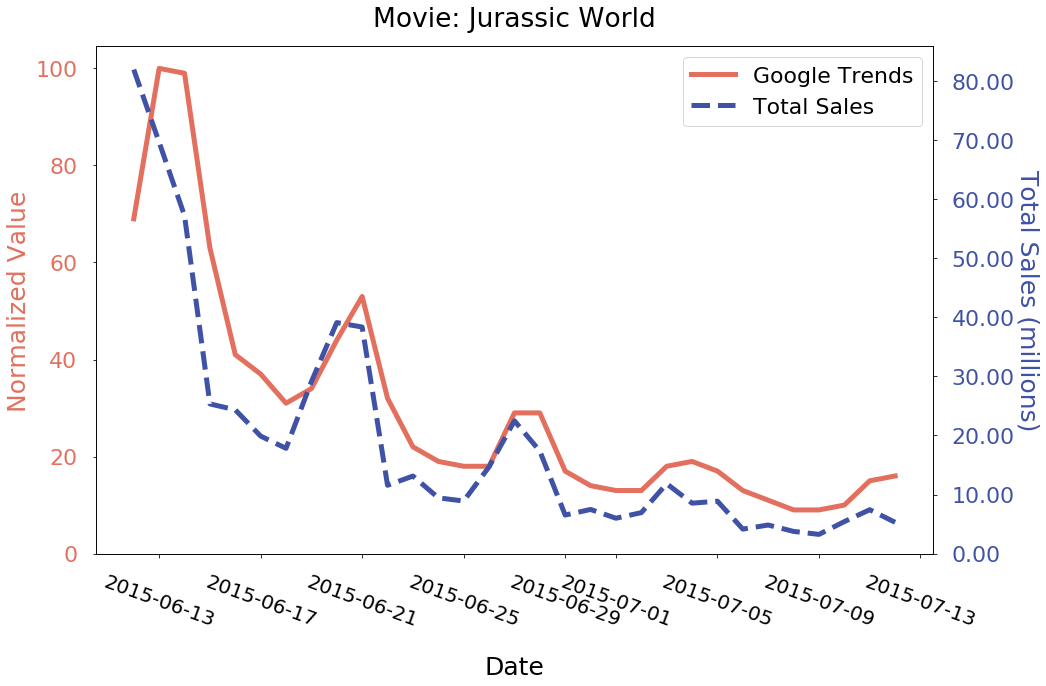

In [20]:
keywords = ['Jurassic World']
start_date = '2015-06-12'
end_date = '2015-07-12'
jurassicworld_trends = gt.get_trends_data(keywords=keywords, start_date=start_date, end_date=end_date).data
jurassicworld_sales = box_office_df['jurassicworld'].dropna().to_frame()
misc.line_plot_2Yaxes_without_norm(jurassicworld_trends, jurassicworld_sales, False, "Jurassic World Time Series")

## 1.2.1 Top Movies by Year

This is the comparison of Google Trends and Sales data for top movies for each year

### Year: 2019

In [21]:
year_sales_df = pd.read_csv("../../../conf/movies/year_sales.csv").set_index('keywords')

2019-12-06 08:45:44,963 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['Toy Story', 'Lion King', 'Captain Marvel', 'Spider man', 'Avengers'], start_date - 2019-01-01, end_date - 2019-12-31, category - None and geo - 
2019-12-06 08:45:45,654 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (48, 5)
2019-12-06 08:45:45,670 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            Toy Story  Lion King  Captain Marvel  Spider man  Avengers
date                                                                  
2019-01-06          3          3               5           6         8
2019-01-13          2          3               3          12         7
2019-01-20          2          3               2           5         6
2019-01-27          3          2               2           4         5
2019-02-03          4          2               4           4         9


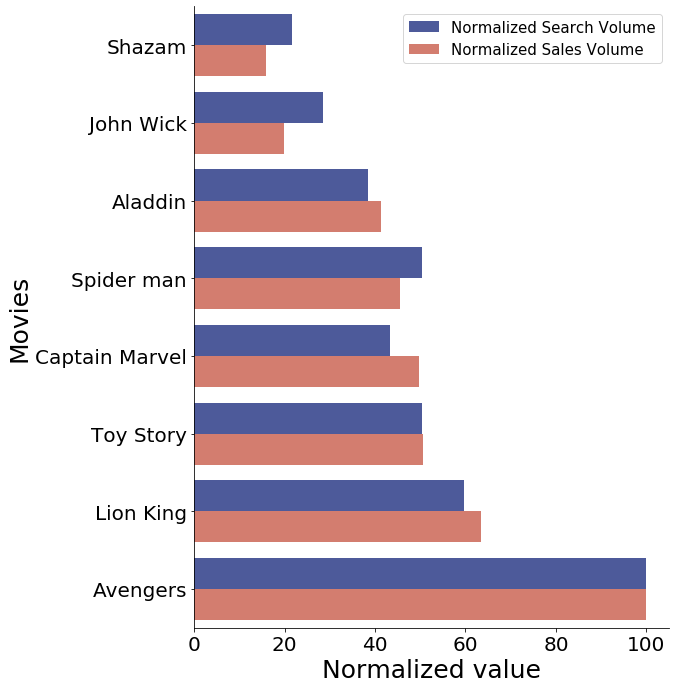

In [22]:
keywords = ['Avengers', 'Toy Story', 'Lion King', 'Captain Marvel', 'Spider man', 'Aladdin', 'John Wick', 'Shazam']
start_date = '2019-01-01'
end_date = '2019-12-31'
trends_df = pd.DataFrame({'Normalized Search Volume':gt.get_trends_data_from_multiple_keywords(keywords, start_date, end_date).data.sum(axis=0)}).apply(lambda x : x*100/x.max()).sort_index(axis=0)
 
sales_2019_df = year_sales_df['2019'].dropna().to_frame().rename(columns={'2019': 'Normalized Sales Volume'})
 
df = sales_2019_df.merge(trends_df, left_index=True, right_index=True)
df = df[['Normalized Search Volume', 'Normalized Sales Volume']]
misc.bar_plot_comparison(df.sort_values('Normalized Sales Volume'), save_fig=False)

### Year: 2018

2019-12-06 08:45:50,251 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['Avengers', 'Incredibles', 'Jurassic World', 'Deadpool 2', 'Black Panther'], start_date - 2018-01-01, end_date - 2018-12-31, category - None and geo - 
2019-12-06 08:45:51,087 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (52, 5)
2019-12-06 08:45:51,091 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            Avengers  Incredibles  Jurassic World  Deadpool 2  Black Panther
date                                                                        
2018-01-07         3            1               1           1              8
2018-01-14         3            1               1           1              6
2018-01-21         3            2               1           0              6
2018-01-28         3            1               1           0             15
2018-02-04         4         

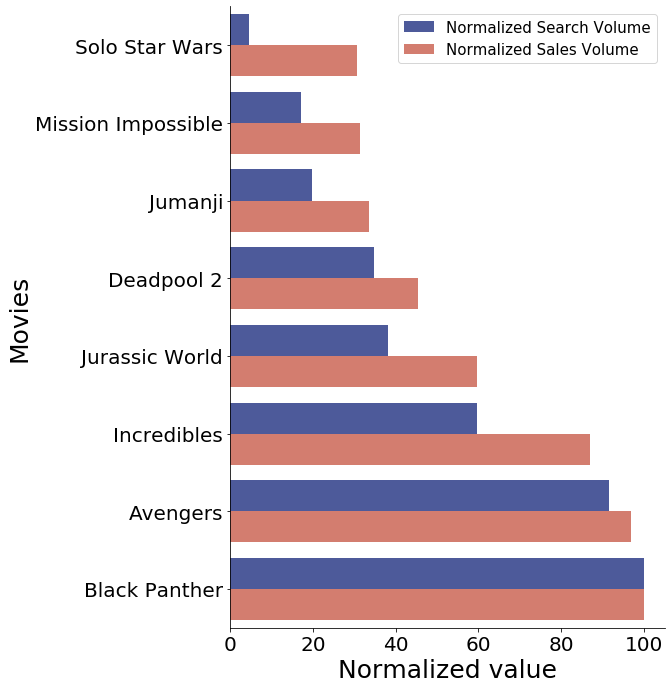

In [23]:
keywords = ['Black Panther', 'Avengers', 'Incredibles', 'Jurassic World', 'Deadpool 2', 'Jumanji', 'Mission Impossible', 'Solo Star Wars']
start_date = '2018-01-01'
end_date = '2018-12-31'
trends_df = pd.DataFrame({'Normalized Search Volume':gt.get_trends_data_from_multiple_keywords(keywords, start_date, end_date).data.sum(axis=0)}).apply(lambda x : x*100/x.max()).sort_index(axis=0)

sales_2018_df = year_sales_df['2018'].dropna().to_frame().rename(columns={'2018': 'Normalized Sales Volume'})

df = sales_2018_df.merge(trends_df, left_index=True, right_index=True)
df = df[['Normalized Search Volume', 'Normalized Sales Volume']]
misc.bar_plot_comparison(df.sort_values('Normalized Sales Volume'), save_fig=False)

## 1.2.2 Top Action Movies

This is the comparison of movies' trends and box office sales for the Action genre

C:\Users\Tushar\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\Tushar\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
2019-12-06 08:46:00,223 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['Deadpool', 'Suicide Squad', 'Doctor Strange', 'Jason Bourne', 'Star Wars'], start_date - 2016-01-01, end_date - 2016-12-31, category - None and geo - 
2019-12-06 08:46:01,130 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (52, 5)
2019-12-06 08:46:01,130 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            Deadpool  Suicide Squad  Doctor Strange  Jason Bourne  Star Wars
da

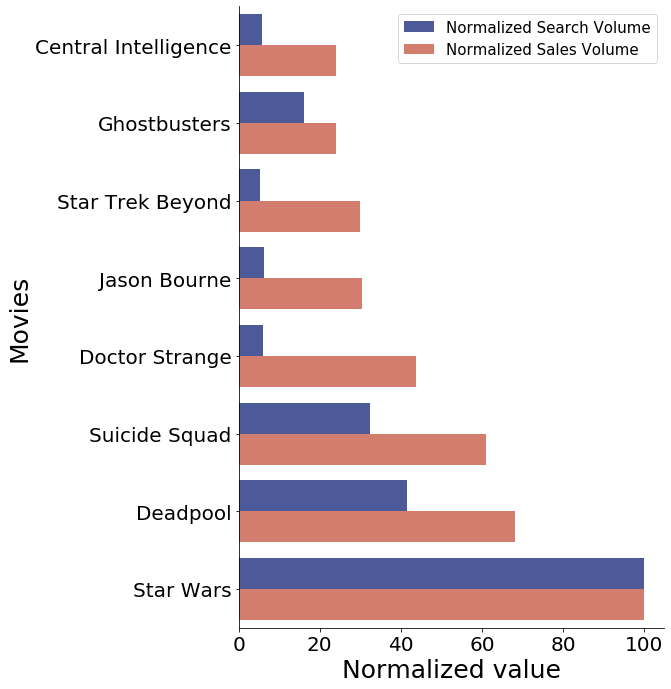

In [24]:
imdb = pd.read_csv("../../../conf/movies/imdb.csv")
genres = imdb['Genre'].str.split(',', expand=True)[0]
imdb['Genre'] = genres
imdb = imdb.sort_values(by=['Genre','Revenue (Millions)'], ascending=[True, False])
pat = '|'.join(['({})'.format(re.escape(c)) for c in string.punctuation])

imdb = imdb[~imdb['Title'].str.contains(pat)]
imdb = imdb[imdb['Year'] == 2016]

imdb_action = imdb[imdb['Genre'] == 'Action'][:8]
imdb_action = imdb_action[['Title', 'Revenue (Millions)']]
imdb_action_df = imdb_action.rename(columns={"Revenue (Millions)":"Normalized Sales Volume", "Title": "Movies"})
imdb_action_df.set_value(12, 'Movies', 'Star Wars')
idx = range(len(imdb_action))
movies_action = list(imdb_action_df.iloc[idx]['Movies'])
imdb_action_df.set_index(keys='Movies', inplace=True)
  
start_date = '2016-01-01'
end_date = '2016-12-31'
search_df = pd.DataFrame({'Normalized Search Volume':gt.get_trends_data_from_multiple_keywords(movies_action, start_date, end_date).data.sum(axis=0)}).apply(lambda x : x*100/x.max()).sort_index(axis=0)
  
df = imdb_action_df.apply(lambda x : x*100/x.max()).merge(search_df, left_index=True, right_index=True)
df = df[['Normalized Search Volume', 'Normalized Sales Volume']]
misc.bar_plot_comparison(df.sort_values('Normalized Sales Volume'), save_fig=False)

## 1.3 Movie Ratings vs Trends

This is the comparison of movies' popularity and sales figures, by grouping them by their Review ratings. This shows that Reviews do not follow the trends given by search results

In [25]:
# Data Preparation
imdb = pd.read_csv("../../../conf/movies/imdb.csv")
genres = imdb['Genre'].str.split(',', expand=True)[0]
imdb['Genre'] = genres
imdb = imdb.sort_values(by=['Genre','Revenue (Millions)'], ascending=[True, False])
pat = '|'.join(['({})'.format(re.escape(c)) for c in string.punctuation])
imdb = imdb[~imdb['Title'].str.contains(pat)]
imdb = imdb[imdb['Title'].str.split().str.len() <= 4]

df_popularity_list = []
for year in [2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    imdb_year = imdb[imdb['Year'] == year]
    imdb_score = imdb_year.sort_values(by="Metascore", ascending=False).dropna()
    bins = [0, 40, 60, 80, 100]
    scores = ['0-4', '4-6', '6-8', '8-10']
    imdb_score['MetascoreRange'] = pd.cut(imdb_score['Metascore'], bins, labels=scores)
    imdb_score.drop('Metascore', axis=1, inplace=True)
    imdb_score.rename(columns={"Revenue (Millions)":"Revenue", "MetascoreRange":"Score"}, inplace=True)
    imdb_score = imdb_score.sort_values(by=['Votes'], ascending=[False])[:40]
    imdb_score_grp_popularity = imdb_score.groupby(['Score']).count()['Votes'].to_frame()
    df_popularity_list.append(imdb_score_grp_popularity)

df_revenue_list = []
for year in [2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    imdb_year = imdb[imdb['Year'] == year]
    imdb_score = imdb_year.sort_values(by="Metascore", ascending=False).dropna()
    bins = [0, 40, 60, 80, 100]
    scores = ['0-4', '4-6', '6-8', '8-10']
    imdb_score['MetascoreRange'] = pd.cut(imdb_score['Metascore'], bins, labels=scores)
    imdb_score.drop('Metascore', axis=1, inplace=True)
    imdb_score.rename(columns={"Revenue (Millions)":"Revenue", "MetascoreRange":"Score"}, inplace=True)
    imdb_score = imdb_score.sort_values(by=['Revenue'], ascending=[False])[:40]
    imdb_score_grp_revenue = imdb_score.groupby(['Score']).count()['Revenue'].to_frame()
    df_revenue_list.append(imdb_score_grp_revenue) 

C:\Users\Tushar\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [26]:
revenue_dict = defaultdict(list)
for i in range(len(df_revenue_list)):
    revenue_dict['0-4'].append(list(df_revenue_list[i]['Revenue'])[0])
    revenue_dict['4-6'].append(list(df_revenue_list[i]['Revenue'])[1])
    revenue_dict['6-8'].append(list(df_revenue_list[i]['Revenue'])[2])
    revenue_dict['8-10'].append(list(df_revenue_list[i]['Revenue'])[3])

popularity_dict = defaultdict(list)
for i in range(len(df_popularity_list)):
    popularity_dict['0-4'].append(list(df_popularity_list[i]['Votes'])[0])
    popularity_dict['4-6'].append(list(df_popularity_list[i]['Votes'])[1])
    popularity_dict['6-8'].append(list(df_popularity_list[i]['Votes'])[2])
    popularity_dict['8-10'].append(list(df_popularity_list[i]['Votes'])[3])  

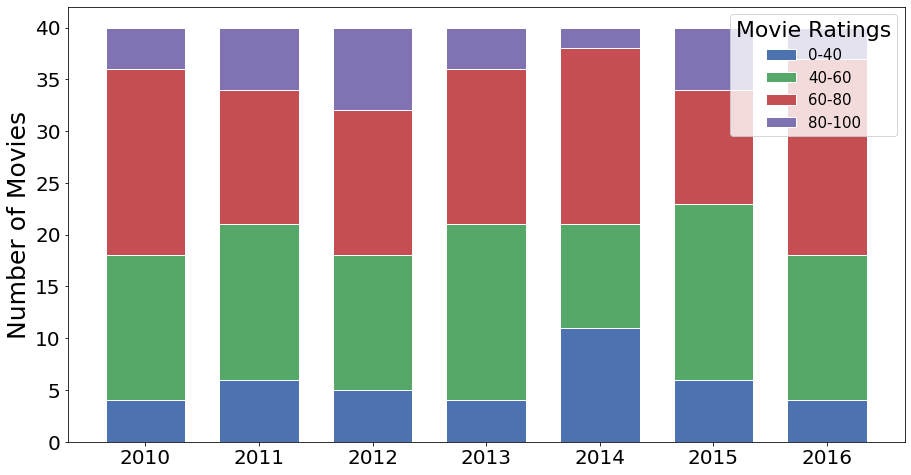

In [27]:
# By Revenue
misc.stacked_bar_plot(revenue_dict, False)   

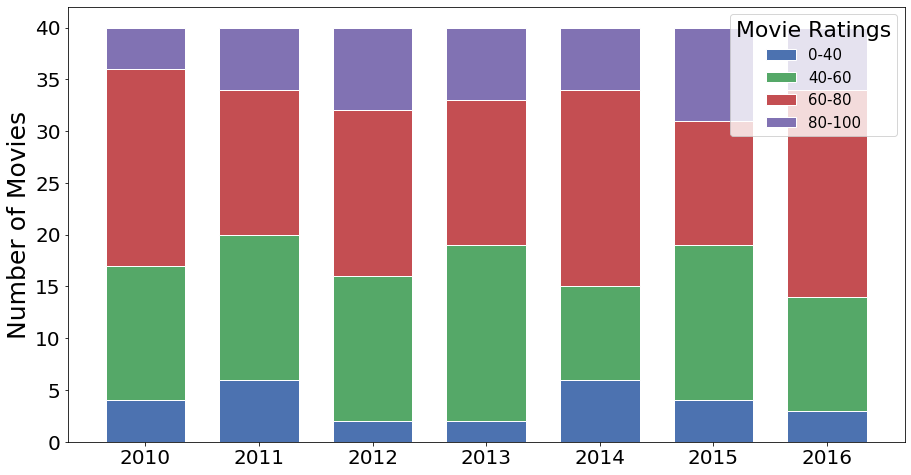

In [28]:
# By Popularity
misc.stacked_bar_plot(popularity_dict, False)

# 2 Video Games Analysis

In [29]:
cat = '8' # Category = Games
gt = GoogleTrends()

2019-12-06 08:46:22,429 | [google_trends.py __init__:35] | [INFO] - Successfully connected session to Google Trends


## 2.1 Individual Games vs Search Trends

This analysis compare games' Monthly Search Volume with corresponding Monthly Sales
over a 6-month launch period, from 1 month before launch to 4 months after launch.

In [30]:
def get_date(release_date):
    """
    This function returns the starting and ending dates based on the release date. 
    starting date = 1 month before release date
    ending date = 4 months after release date
    
    Args:
        release_date (str): 'Year-Month-Day', e.g. '2017-11-03'
    Return:
        starting date and ending date
    """
    date = pd.Timestamp(release_date) - timedelta.relativedelta(months=1)
    time_range = pd.date_range(start=date,periods=6,freq='m').strftime('%Y-%m-%d').tolist()
    start_date = time_range[0]
    end_date = time_range[-1]
    return start_date, end_date

In [31]:
# Vgchartz Data
vg_df = pd.read_csv("../../../conf/video_games/input/vgsales-game-sale-history.csv",delimiter=',').T
vg_df.columns = vg_df.iloc[0]
vg_df.drop(vg_df.index[0],axis=0,inplace=True)

2019-12-06 08:46:28,088 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['Call of Duty: WWII'], start_date - 2017-10-31, end_date - 2018-03-31, category - 8 and geo - 
2019-12-06 08:46:29,104 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (152, 1)
2019-12-06 08:46:29,104 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            Call of Duty: WWII
date                          
2017-10-31                  10
2017-11-01                  14
2017-11-02                  24
2017-11-03                  96
2017-11-04                 100
2019-12-06 08:46:29,122 | [google_trends.py get_trends_data_from_multiple_keywords:183] | [INFO] - Concatenated dataframe of size - (152, 1)
2019-12-06 08:46:29,126 | [google_trends.py get_trends_data_from_multiple_keywords:184] | [INFO] - Sample rows from dataframe: 
            Call of Duty: WWII
date                          

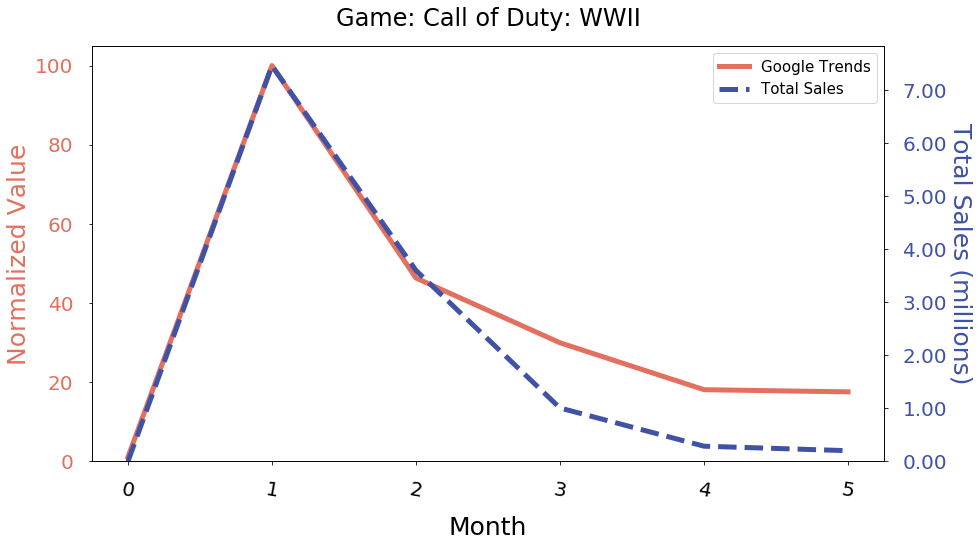

In [32]:
# Google Trends Data
keywords = ['Call of Duty: WWII']
release_date = '2017-11-03'
start_date, end_date = get_date(release_date)
gt.get_trends_data_from_multiple_keywords(keywords=keywords, start_date=start_date, end_date=end_date, category=cat)
gt.sort_data_by_year_month() # sort data by Year-Month
misc.line_plot_2Yaxes(gt.data_by_year_month, vg_df[keywords[0]], save_fig=False)

2019-12-06 08:46:32,127 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['Battlefield 1'], start_date - 2016-09-30, end_date - 2017-02-28, category - 8 and geo - 
2019-12-06 08:46:33,384 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (152, 1)
2019-12-06 08:46:33,384 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            Battlefield 1
date                     
2016-09-30              9
2016-10-01             10
2016-10-02             13
2016-10-03             11
2016-10-04             10
2019-12-06 08:46:33,399 | [google_trends.py get_trends_data_from_multiple_keywords:183] | [INFO] - Concatenated dataframe of size - (152, 1)
2019-12-06 08:46:33,407 | [google_trends.py get_trends_data_from_multiple_keywords:184] | [INFO] - Sample rows from dataframe: 
            Battlefield 1
date                     
2016-09-30            9.0
2016-10-01           10

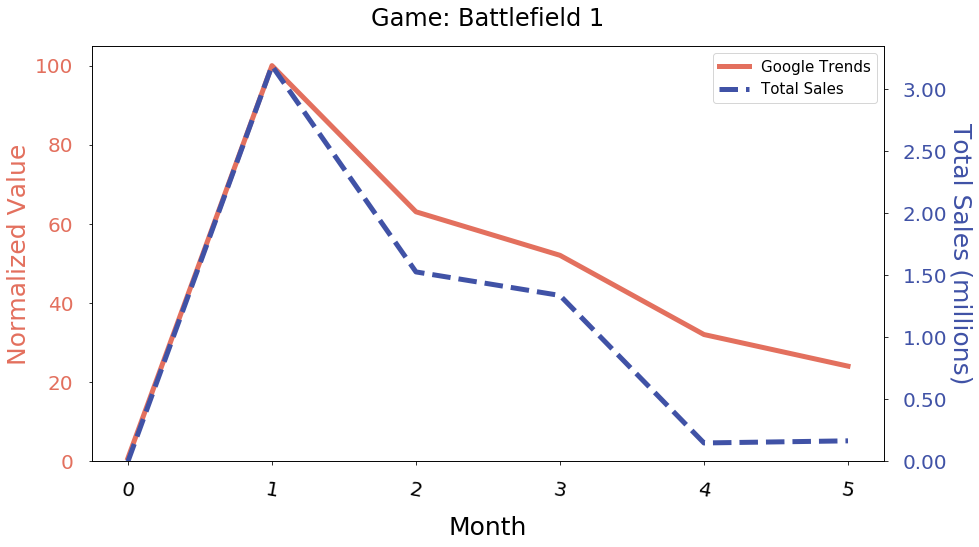

In [33]:
# Google Trends Data
keywords = ['Battlefield 1']
release_date = '2016-10-21'
start_date, end_date = get_date(release_date)
gt.get_trends_data_from_multiple_keywords(keywords=keywords, start_date=start_date, end_date=end_date, category=cat)
gt.sort_data_by_year_month() # sort data by Year-Month
misc.line_plot_2Yaxes(gt.data_by_year_month, vg_df[keywords[0]], save_fig=False)

2019-12-06 08:46:43,093 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['1-2-Switch'], start_date - 2017-02-28, end_date - 2017-07-31, category - 8 and geo - 
2019-12-06 08:46:43,931 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (154, 1)
2019-12-06 08:46:43,931 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            1-2-Switch
date                  
2017-02-28          52
2017-03-01          34
2017-03-02          69
2017-03-03          73
2017-03-04         100
2019-12-06 08:46:43,945 | [google_trends.py get_trends_data_from_multiple_keywords:183] | [INFO] - Concatenated dataframe of size - (154, 1)
2019-12-06 08:46:43,949 | [google_trends.py get_trends_data_from_multiple_keywords:184] | [INFO] - Sample rows from dataframe: 
            1-2-Switch
date                  
2017-02-28        52.0
2017-03-01        34.0
2017-03-02        69.0
2017-03-03

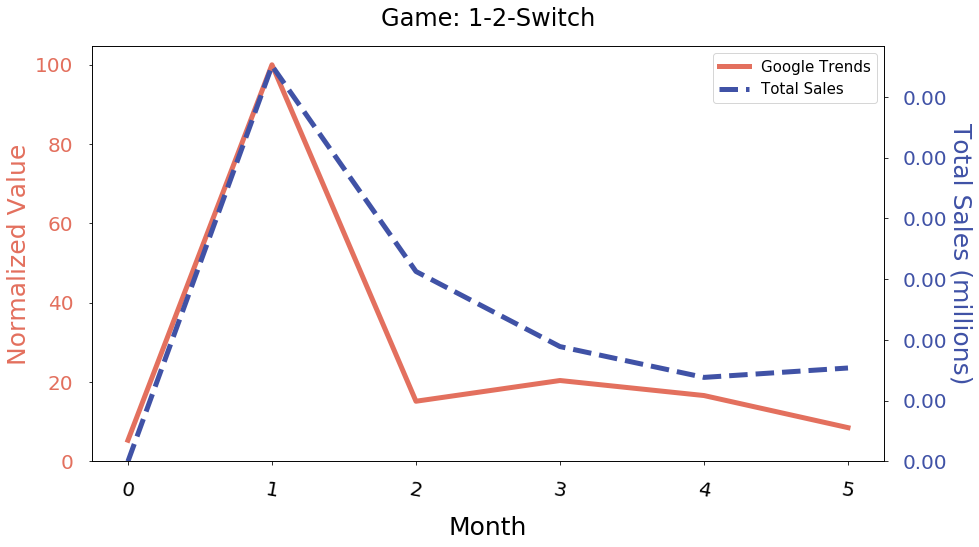

In [35]:
# Google Trends Data
keywords = ['1-2-Switch']
release_date = '2017-03-03'
start_date, end_date = get_date(release_date)
gt.get_trends_data_from_multiple_keywords(keywords=keywords, start_date=start_date, end_date=end_date, category=cat)
gt.sort_data_by_year_month() # sort data by Year-Month
misc.line_plot_2Yaxes(gt.data_by_year_month, vg_df[keywords[0]], save_fig=False)

2019-12-06 08:46:48,780 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['Pokemon Ultra Sun and Ultra Moon'], start_date - 2017-10-31, end_date - 2018-03-31, category - 8 and geo - 
2019-12-06 08:46:49,631 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (152, 1)
2019-12-06 08:46:49,631 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            Pokemon Ultra Sun and Ultra Moon
date                                        
2017-10-31                                 7
2017-11-01                                14
2017-11-02                                29
2017-11-03                                22
2017-11-04                                20
2019-12-06 08:46:49,644 | [google_trends.py get_trends_data_from_multiple_keywords:183] | [INFO] - Concatenated dataframe of size - (152, 1)
2019-12-06 08:46:49,648 | [google_trends.py get_trends_data_from_multiple_key

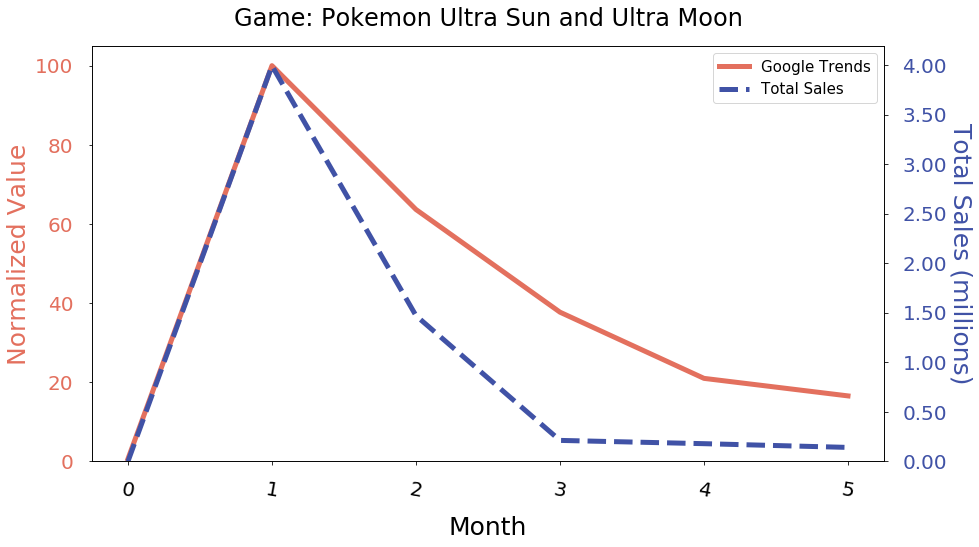

In [36]:
# Google Trends Data
keywords = ['Pokemon Ultra Sun and Ultra Moon']
release_date = '2017-11-17'
start_date, end_date = get_date(release_date)
gt.get_trends_data_from_multiple_keywords(keywords=keywords, start_date=start_date, end_date=end_date, category=cat)
gt.sort_data_by_year_month() # sort data by Year-Month
misc.line_plot_2Yaxes(gt.data_by_year_month, vg_df[keywords[0]], save_fig=False)

## 2.2.1 Top Games by Year

This analysis compares the Total Search Volume with the Total Sales of 
Top 8 video games released in a specified Year or by a specified Platform.<br>
For example, with year = 2015, top_num = 100, it returns top 100 games released in 2015

In [37]:
start_date = '2004-01-01'
end_date = '2019-11-19'
filename = '../../../conf/video_games/input/vgsales-refined-data.csv'

In [38]:
def top_games(vg_df):
    """
    This function gets total search volume of keywords from the index of the input dataframe
    and compares total search volume with total sales using a bar plot.
    
    Args:
        vg_df (dataframe): dataframe contains total sales
    """
    assert isinstance(vg_df,pd.DataFrame)
    
    # get keywords from sorted vgchart dataframe
    keywords = vg_df.index.tolist()
    
    # optimize keywords by suggestion from Pytrends
    keywords_suggested = []
    for kw in keywords:
        try:
            keywords_suggested.append(gt.trend_request.suggestions(kw)[0]['mid'])
        except IndexError:
            keywords_suggested.append(kw)

    # get and process google-trends data
    gt.get_trends_data_from_multiple_keywords(keywords=keywords_suggested, start_date=start_date,end_date=end_date, category=cat)
    gt.sort_data_by_year()

    # create a dataframe storing the max search volume of each year
    gt_df = gt.data_by_year.max().to_frame(name='Normalized Search Volume')

    # normalize and set game names as index
    gt_df = gt_df / gt_df.max() * 100
    gt_df.set_index(vg_df.index,inplace=True)

    # combine two dataframes
    df = pd.concat((vg_df,gt_df),axis=1,sort=True)

    # drop rows with zero search volume
    df.drop(df[gt_df.iloc[:,0] == 0].index,inplace=True)
    df = df / df.max() * 100
    df['diff'] = abs(df.iloc[:,0]-df.iloc[:,1])
    df2 = df.drop(df[df['diff'] > 5].index)

    # normalize by max of each column
    df2 = df2 / df2.max() * 100 
    df2['diff'] = abs(df2.iloc[:,0]-df2.iloc[:,1])
    df2 = df2.sort_values(by='Normalized Sales Volume',ascending=False)

    # plot
    misc.bar_plot(df2.iloc[:num_games,:],ylabel='Games',save_fig=False)

### Year: 2015

In [39]:
# Get sorted vgchartz dataframe with Index = Game Name, Column = Total Sales
year = 2015
top_num = 100
vg_df = data_preprocess.keyword_data_sorting(filename,year=[year],top=top_num)

2019-12-06 08:47:53,550 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['/m/0139_ztp', '/m/06zmzsz', '/m/05b10f9', '/m/013ccj8n', '/m/0134qybc'], start_date - 2004-01-01, end_date - 2019-11-19, category - 8 and geo - 
2019-12-06 08:47:54,928 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (191, 5)
2019-12-06 08:47:54,932 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            /m/0139_ztp  /m/06zmzsz  /m/05b10f9  /m/013ccj8n  /m/0134qybc
date                                                                     
2004-01-01            0           0           0            0            0
2004-02-01            0           0           0            0            0
2004-03-01            0           0           0            0            0
2004-04-01            0           0           0            0            0
2004-05-01            0           0           0     

2019-12-06 08:48:03,558 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['/g/11gg6bvv8x', '/m/0vpvzzc', '/m/013cc__d', '/m/011b0hb2', '/m/0134qybc'], start_date - 2004-01-01, end_date - 2019-11-19, category - 8 and geo - 
2019-12-06 08:48:04,199 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (191, 5)
2019-12-06 08:48:04,203 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            /g/11gg6bvv8x  /m/0vpvzzc  /m/013cc__d  /m/011b0hb2  /m/0134qybc
date                                                                        
2004-01-01              0           0            0            0            0
2004-02-01              0           0            0            0            0
2004-03-01              0           0            0            0            0
2004-04-01              0           0            0            0            0
2004-05-01              0      

2019-12-06 08:48:11,213 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['/m/011jk_02', '/m/02qyf34', '/g/1z2v3xcwn', '/g/11c3khn18w', '/m/0134qybc'], start_date - 2004-01-01, end_date - 2019-11-19, category - 8 and geo - 
2019-12-06 08:48:12,330 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (191, 5)
2019-12-06 08:48:12,330 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            /m/011jk_02  /m/02qyf34  /g/1z2v3xcwn  /g/11c3khn18w  /m/0134qybc
date                                                                         
2004-01-01            0           0             0              0            0
2004-02-01            0           0             0              0            0
2004-03-01            0           0             0              0            0
2004-04-01            0           0             0              0            0
2004-05-01            0 

2019-12-06 08:48:20,434 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (191, 5)
2019-12-06 08:48:20,438 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            /m/0zmzw5c  /m/012ng959  /g/11bw3cs0xh  /m/02rfnb  /m/0134qybc
date                                                                      
2004-01-01           0            0              0         15            0
2004-02-01           0            0              0         13            0
2004-03-01           0            0              0         20            0
2004-04-01           0            0              0         19            0
2004-05-01           0            0              0         17            0
2019-12-06 08:48:20,541 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['Skylanders SuperChargers Racing', '/m/011c9_61', '/g/11bc96br98', '/g/11bbrl5t3m', '/m/0134qybc'], start_date - 2004

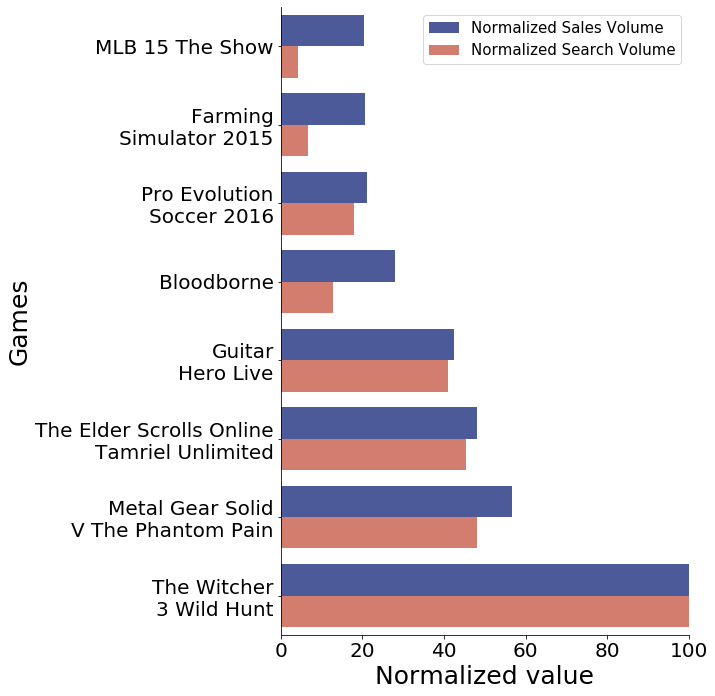

In [40]:
num_games = 8 # Top number of games to be plotted
top_games(vg_df)

### Year: 2017

2019-12-06 08:49:19,602 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['/g/11g6j816qz', '/g/11c2y30fqw', '/g/11c2rczmmn', '/m/01172_b7', '/g/11c7p9h2zw'], start_date - 2004-01-01, end_date - 2019-11-19, category - 8 and geo - 
2019-12-06 08:49:20,519 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (191, 5)
2019-12-06 08:49:20,527 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            /g/11g6j816qz  /g/11c2y30fqw  /g/11c2rczmmn  /m/01172_b7  \
date                                                                   
2004-01-01              1              0              1           15   
2004-02-01              0              0              1           12   
2004-03-01              0              0              0           11   
2004-04-01              0              0              0           12   
2004-05-01              1              0              

2019-12-06 08:49:26,951 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['/m/0dlkf1v', '/g/11d_77_rkx', '/g/11dxbkyrq3', '/m/0118kdjl', '/g/11c7p9h2zw'], start_date - 2004-01-01, end_date - 2019-11-19, category - 8 and geo - 
2019-12-06 08:49:27,999 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (191, 5)
2019-12-06 08:49:27,999 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            /m/0dlkf1v  /g/11d_77_rkx  /g/11dxbkyrq3  /m/0118kdjl  \
date                                                                
2004-01-01           2              1              2           18   
2004-02-01           2              1              2           13   
2004-03-01           2              1              2           11   
2004-04-01           2              1              2           13   
2004-05-01           2              1              2           12   

     

C:\Users\Tushar\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


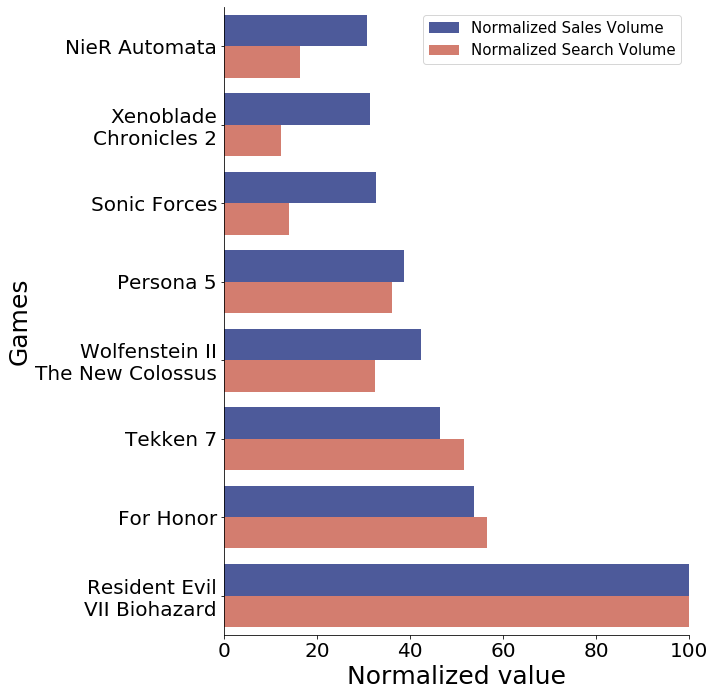

In [41]:
year = 2017
top_num = 50
vg_df = data_preprocess.keyword_data_sorting(filename,year=[year],top=top_num)
num_games = 8 # Top number of games to be plotted
top_games(vg_df)

## 2.2.2 Top Games by Platform

For example, with platform = 'PS4', top_num = 100, it returns top 100 games released by 'PS4'

### Platform: PS4

2019-12-06 08:50:37,152 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['/m/0134qybc', '/g/11c1wy1np6', '/g/11c7p9h2zw', '/g/11g6j816qz', '/m/0hgnzjh'], start_date - 2004-01-01, end_date - 2019-11-19, category - 8 and geo - 
2019-12-06 08:50:38,184 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (191, 5)
2019-12-06 08:50:38,184 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            /m/0134qybc  /g/11c1wy1np6  /g/11c7p9h2zw  /g/11g6j816qz  \
date                                                                   
2004-01-01            0              0              1              0   
2004-02-01            0              0              1              0   
2004-03-01            0              0              0              0   
2004-04-01            0              0              0              0   
2004-05-01            0              0              0    

2019-12-06 08:50:46,531 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['/m/010rs1_r', '/m/0_x60r0', '/g/11dflx0tz0', '/m/010lwj04', '/m/0hgnzjh'], start_date - 2004-01-01, end_date - 2019-11-19, category - 8 and geo - 
2019-12-06 08:50:47,680 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (191, 5)
2019-12-06 08:50:47,688 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            /m/010rs1_r  /m/0_x60r0  /g/11dflx0tz0  /m/010lwj04  /m/0hgnzjh
date                                                                       
2004-01-01            0           0              0            0           4
2004-02-01            0           0              0            0           3
2004-03-01            0           0              0            0           3
2004-04-01            0           0              0            0           3
2004-05-01            0           0   

2019-12-06 08:50:55,474 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['/m/025tydm', '/g/11c2npq_n_', '/m/0h5560h', '/m/0zn020m', '/m/0hgnzjh'], start_date - 2004-01-01, end_date - 2019-11-19, category - 8 and geo - 
2019-12-06 08:50:56,782 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (191, 5)
2019-12-06 08:50:56,786 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            /m/025tydm  /g/11c2npq_n_  /m/0h5560h  /m/0zn020m  /m/0hgnzjh
date                                                                     
2004-01-01           2              0           0           0           4
2004-02-01           1              0           0           0           3
2004-03-01           1              0           0           0           3
2004-04-01           1              0           0           0           3
2004-05-01           1              0           0   

2019-12-06 08:51:04,572 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['/m/013f80cc', '/m/012gbr7b', '/g/11f54k8kh3', '/m/0hgnzjh'], start_date - 2004-01-01, end_date - 2019-11-19, category - 8 and geo - 
2019-12-06 08:51:05,503 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (191, 4)
2019-12-06 08:51:05,503 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            /m/013f80cc  /m/012gbr7b  /g/11f54k8kh3  /m/0hgnzjh
date                                                           
2004-01-01            0            0              0           4
2004-02-01            0            0              0           3
2004-03-01            0            0              0           3
2004-04-01            0            0              0           3
2004-05-01            0            0              0           3
2019-12-06 08:51:05,579 | [google_trends.py get_trends_data_

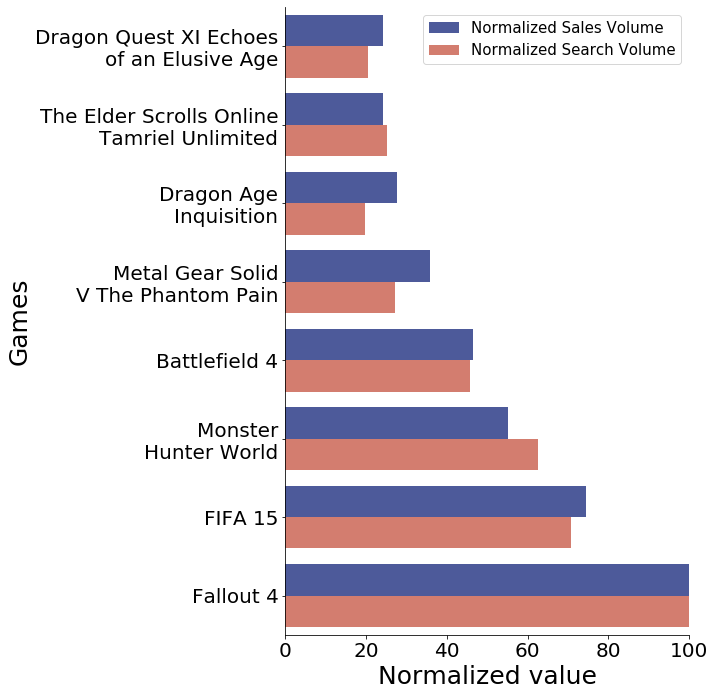

In [42]:
platform = 'PS4'
top_num = 100
vg_df = data_preprocess.keyword_data_sorting(filename,platform=[platform],top=top_num)
num_games = 8 # Top number of games to be plotted
top_games(vg_df)

### Platform: Xbox One

2019-12-06 08:52:11,212 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['/m/0134qybc', '/g/11c7p9h2zw', '/g/11c1wy1np6', '/m/09v6kpg', '/m/0hgnzjh'], start_date - 2004-01-01, end_date - 2019-11-19, category - 8 and geo - 
2019-12-06 08:52:12,365 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (191, 5)
2019-12-06 08:52:12,365 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            /m/0134qybc  /g/11c7p9h2zw  /g/11c1wy1np6  /m/09v6kpg  /m/0hgnzjh
date                                                                         
2004-01-01            0              1              0           0           4
2004-02-01            0              1              0           0           3
2004-03-01            0              0              0           0           3
2004-04-01            0              0              0           0           3
2004-05-01            0 

2019-12-06 08:52:19,279 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['/m/0r8m0vk', 'FIFA 19', '/m/010wgnk7', '/g/11dxbkyrq3', '/m/0hgnzjh'], start_date - 2004-01-01, end_date - 2019-11-19, category - 8 and geo - 
2019-12-06 08:52:20,036 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (191, 5)
2019-12-06 08:52:20,036 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            /m/0r8m0vk  FIFA 19  /m/010wgnk7  /g/11dxbkyrq3  /m/0hgnzjh
date                                                                   
2004-01-01           0        0            0              0           4
2004-02-01           0        0            0              0           3
2004-03-01           0        0            0              0           3
2004-04-01           0        0            0              0           3
2004-05-01           0        0            0              0       

2019-12-06 08:52:27,478 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['/m/0jt2y_q', '/m/013bd3tm', '/g/11byx7h7gn', '/g/11bz0bvrsb', '/m/0hgnzjh'], start_date - 2004-01-01, end_date - 2019-11-19, category - 8 and geo - 
2019-12-06 08:52:28,329 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (191, 5)
2019-12-06 08:52:28,329 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            /m/0jt2y_q  /m/013bd3tm  /g/11byx7h7gn  /g/11bz0bvrsb  /m/0hgnzjh
date                                                                         
2004-01-01           0            0              0              0           4
2004-02-01           0            0              0              0           3
2004-03-01           0            0              0              0           3
2004-04-01           0            0              0              0           3
2004-05-01           0  

2019-12-06 08:52:35,453 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['/m/0t50z80', '/g/11b7x0rcyr', '/g/11f54k8kh3', '/m/0hgnzjh'], start_date - 2004-01-01, end_date - 2019-11-19, category - 8 and geo - 
2019-12-06 08:52:36,262 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (191, 4)
2019-12-06 08:52:36,266 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            /m/0t50z80  /g/11b7x0rcyr  /g/11f54k8kh3  /m/0hgnzjh
date                                                            
2004-01-01           0              0              0           4
2004-02-01           0              0              0           3
2004-03-01           0              0              0           3
2004-04-01           0              0              0           3
2004-05-01           0              0              0           3
2019-12-06 08:52:36,354 | [google_trends.py get_tren

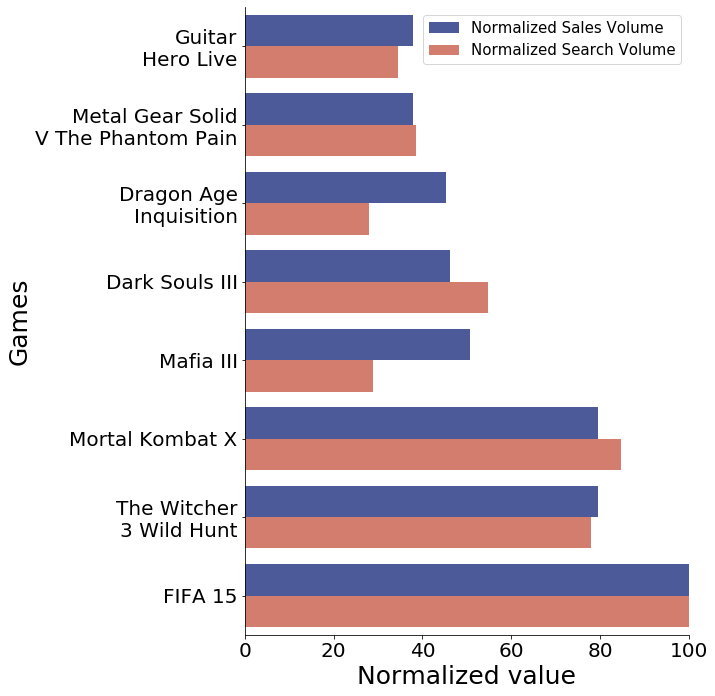

In [43]:
platform = 'XOne'
top_num = 100
vg_df = data_preprocess.keyword_data_sorting(filename,platform=[platform],top=top_num)
num_games = 8 # Top number of games to be plotted
top_games(vg_df)

## 2.3 Platforms' Sales over Time vs Search Trends

This analysis compares the Total Sales of games under the Platforms that
have the highest sales with corresponding Total Search Volume from 2004 to 2018.

There are 11 keyword types
There are 17 years


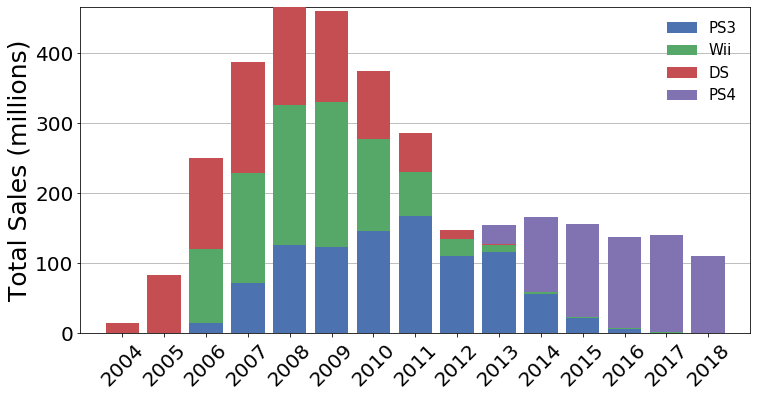

In [44]:
# Vgchartz Data
feature = 'Platform'
fname = '../../../conf/video_games/input/vgsales-refined-data.csv'
vg_df = data_preprocess.data_sorting(fname, feature, limit=4, bar_plot=True)

2019-12-06 08:52:51,305 | [google_trends.py get_trends_data:67] | [INFO] - Sending data to Google Trends with keywords - ['Wii', 'DS', 'PS4', 'PS3'], start_date - 2004-01-01, end_date - 2018-12-31, category - 8 and geo - 
2019-12-06 08:52:53,024 | [google_trends.py get_trends_data:74] | [INFO] - Received dataframe from Google Trends of size - (180, 4)
2019-12-06 08:52:53,028 | [google_trends.py get_trends_data:75] | [INFO] - Sample rows from dataframe: 
            Wii  DS  PS4  PS3
date                         
2004-01-01    0   2    0    2
2004-02-01    0   1    0    1
2004-03-01    0   1    0    1
2004-04-01    0   1    0    1
2004-05-01    0   5    0    1
2019-12-06 08:52:53,036 | [google_trends.py get_trends_data_from_multiple_keywords:183] | [INFO] - Concatenated dataframe of size - (180, 4)
2019-12-06 08:52:53,040 | [google_trends.py get_trends_data_from_multiple_keywords:184] | [INFO] - Sample rows from dataframe: 
            Wii   DS  PS4  PS3
date                          
2

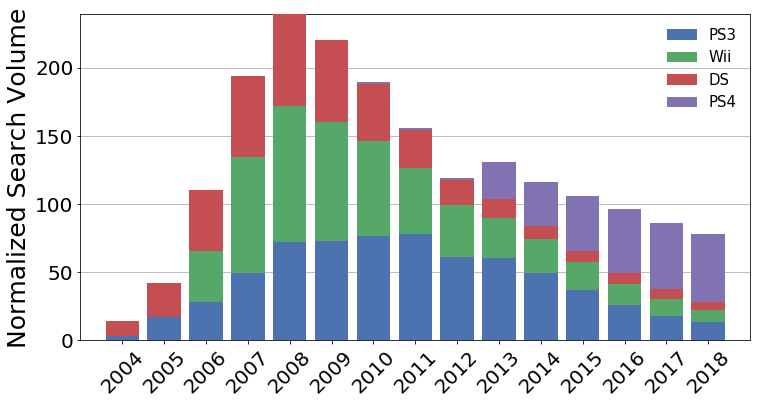

In [45]:
# Google Trends Data
keywords = vg_df.columns.to_list()
start_date = '2004-01-01'
end_date = '2018-12-31'
gt.get_trends_data_from_multiple_keywords(keywords=keywords, start_date=start_date, end_date=end_date, category=cat)
gt.sort_data_by_year()
gt.stack_bar_plot(show_values=False,value_format='{:.2f}',save_fig=False)